# **Pokemon Data Analysis**
---

## **Introduction**
I have found a dataset on one of my favorite childhood interests... Pokemon! I will be doing a data analysis on the 802 Pokemon from the first 7 generations. 

In [53]:
# importing all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

---

## **Data**

### **Source**
I downloaded this data from [kaggle.com](https://www.kaggle.com/datasets/rounakbanik/pokemon) where thousands of datasets can be found.

In [54]:
# read CSV file into a DataFrame
pokemon = pd.read_csv('pokemon.csv')

### **Variables**
* **abilities:** abilities somewhat unique to the pokemon
* **against_type(18):** damage to Pokemon from an attack of each type
* **attack:** (STAT1) 1/6 of the Pokemon's main stats
* **base_egg_steps:** how many steps it takes to hatch the Pokemon
* **base_happiness:** how happy the Pokemon is (max 100)
* **base_total:** (STAT_TOTAL) Summary of Pokemon's 6 main stats
* **capture_rate:** chance of catching the Pokemon (max 255) 
* **classfication:** Pokemon's classification type (similar to a nickname)
* **defense:** (STAT2) 1/6 of the Pokemon's main stats
* **experience_growth:** Pokemon's experience growth
* **height_m:** Pokemon's height
* **hp:** (STAT3) 1/6 of the Pokemon's main stats
* **jappanese_name:** Pokemon's original Japanesse name
* **name:** Pokemon's English name
* **percentage_male:** Percentage of this Pokemon that is Male
* **pokedex_number:** identification number in Pokemon's main index
* **sp_attack:** (STAT4) 1/6 of the Pokemon's main stats
* **sp_defense:** (STAT5) 1/6 of the Pokemon's main stats
* **speed:** (STAT6) 1/6 of the Pokemon's main stats
* **type1:** Pokemon's primary type
* **type2:** Pokemon's secondary type
* **weight_kg:** Pokemon's weight
* **generation:** what generation the Pokemon belongs too (1-7)
* **is_legendary:** 0=Pokemon is not legendary, 1=Pokemon is legendary

In [55]:
# showing preview of database
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


---

## **Data Cleaning**

**1. Deleting Columns not required for this analysis or interesting.**
   * experience_growth
   * classfication
   * japanese_name

In [56]:
# deleting unecessary columns
pokemon.drop(columns=['experience_growth', 'classfication', 'japanese_name'], inplace=True)

 <br>

**2. Female column needed!**

In [57]:
# creating a female column
pokemon['percentage_female'] = 100-pokemon['percentage_male']

 <br>

**3. Arranging Column's correctly**
   * Pokedex number should be database's index
   * Named column's should be the first
   * Main stats columned are not organized in the right order

In [58]:
# rearranging all column's in a nice order
pokemon = pokemon[['pokedex_number', 'generation', 'name', 'type1', 'type2', 'base_total','hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'abilities', 'height_m', 'weight_kg', 'percentage_male', 'percentage_female', 'base_happiness', 'capture_rate', 'base_egg_steps', 'is_legendary', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']]

# making pokedex_number index
pokemon = pokemon.set_index('pokedex_number')

 <br>

**4. DataTypes...**

In [59]:
# showing all column's DataTypes
pokemon.dtypes

generation             int64
name                  object
type1                 object
type2                 object
base_total             int64
hp                     int64
attack                 int64
defense                int64
sp_attack              int64
sp_defense             int64
speed                  int64
abilities             object
height_m             float64
weight_kg            float64
percentage_male      float64
percentage_female    float64
base_happiness         int64
capture_rate          object
base_egg_steps         int64
is_legendary           int64
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychi

* **capture_rate** should be an int ranging from 1-255 but it is listed as an object which means that there must be a string in the data

In [60]:
# scope out any outliers
pokemon['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [61]:
# locate the index of the row with the string
pokemon[['capture_rate']] [pokemon['capture_rate'].str.isnumeric() == False]

,capture_rate
pokedex_number,
774,30 (Meteorite)255 (Core)


In [62]:
# replace original value with 255
pokemon.at[774,'capture_rate'] = 255

# convert column to int
pokemon['capture_rate'] = pd.to_numeric(pokemon['capture_rate'])
pokemon['capture_rate']

pokedex_number
1       45
2       45
3       45
4       45
5       45
      ... 
797     25
798    255
799     15
800      3
801      3
Name: capture_rate, Length: 801, dtype: int64

 <br>

**5. NULLs...**


In [63]:
# find number of nulls in each columns
pokemon.isnull().sum()

generation             0
name                   0
type1                  0
type2                384
base_total             0
hp                     0
attack                 0
defense                0
sp_attack              0
sp_defense             0
speed                  0
abilities              0
height_m              20
weight_kg             20
percentage_male       98
percentage_female     98
base_happiness         0
capture_rate           0
base_egg_steps         0
is_legendary           0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
dtype: int64

**Observations**
* It's far from uncommon to have Pokemon that do not have a secondary type.

* 20 Pokemon are missing their weights and heights... This is small compared to the 800+ pokemon we have.

* 98 Pokemon are neither male nor female.

 <br>

**6. SQL database**

In [64]:
# making connection to database
conn = sqlite3.connect('poke.db')

# put resulted table in SQL database
pokemon.to_sql('poke', conn)

801

 <br>

**7. Cleaned Database**

In [65]:
# showing new DataFrame
pokemon

,generation,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1,Bulbasaur,grass,poison,318,45,49,49,65,65,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,1,Ivysaur,grass,poison,405,60,62,63,80,80,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,1,Venusaur,grass,poison,625,80,100,123,122,120,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
4,1,Charmander,fire,NaN,309,39,52,43,60,50,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
5,1,Charmeleon,fire,NaN,405,58,64,58,80,65,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,7,Celesteela,steel,flying,570,97,101,103,107,101,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
798,7,Kartana,grass,steel,570,59,181,131,59,31,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
799,7,Guzzlord,dark,dragon,570,223,101,53,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5


---

## **Exploratory Data Analysis**

## General Statistics

In [66]:
# describing first 20 columns (everything before 'against_' data)
pokemon.iloc[:,:20].describe()

,generation,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,percentage_male,percentage_female,base_happiness,capture_rate,base_egg_steps,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,781.000000,781.000000,703.000000,703.000000,801.000000,801.000000,801.000000,801.000000
mean,3.690387,428.377029,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,1.163892,61.378105,55.155761,44.844239,65.362047,98.956305,7191.011236,0.087391
std,1.930420,119.203577,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.080326,109.354766,20.261623,20.261623,19.598948,76.409828,6558.220422,0.282583
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,0.000000,0.000000,0.000000,3.000000,1280.000000,0.000000
25%,2.000000,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,0.600000,9.000000,50.000000,50.000000,70.000000,45.000000,5120.000000,0.000000
50%,4.000000,435.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,1.000000,27.300000,50.000000,50.000000,70.000000,60.000000,5120.000000,0.000000
75%,5.000000,505.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,1.500000,64.800000,50.000000,50.000000,70.000000,170.000000,6400.000000,0.000000
max,7.000000,780.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,14.500000,999.900000,100.000000,100.000000,140.000000,255.000000,30720.000000,1.000000


In [67]:
# describing first 20 columns (all 'against_' data)
pokemon.iloc[:,20:].describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


 <br>

## Some Fun Top 10s!!!

Top 10 Strongest Pokemon (Total Stats)!

In [68]:
# query data with SQL and putting it in a DataFrame
sql_query = 'SELECT * FROM poke ORDER BY base_total DESC LIMIT 10'
data = pd.read_sql(sql_query, conn)
data = data.set_index('pokedex_number')
data

,generation,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
150,1,Mewtwo,psychic,None,780,106,150,70,194,120,...,2.0,1.00,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0
384,3,Rayquaza,dragon,flying,780,105,180,100,180,100,...,1.0,0.25,0.0,4.0,1.0,1.0,1.00,2.0,1.0,0.5
382,3,Kyogre,water,None,770,100,150,90,180,160,...,1.0,2.00,1.0,0.5,1.0,1.0,1.00,1.0,0.5,0.5
383,3,Groudon,ground,None,770,100,180,160,150,90,...,1.0,2.00,1.0,2.0,1.0,0.5,1.00,0.5,1.0,2.0
493,4,Arceus,normal,None,720,120,120,120,120,120,...,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
718,6,Zygarde,dragon,ground,708,216,100,121,91,95,...,1.0,1.00,1.0,4.0,1.0,0.5,1.00,0.5,1.0,1.0
248,2,Tyranitar,rock,dark,700,100,164,150,95,120,...,0.5,2.00,2.0,1.0,0.5,0.5,0.00,1.0,2.0,2.0
373,3,Salamence,dragon,flying,700,95,145,130,120,90,...,1.0,0.25,0.0,4.0,1.0,1.0,1.00,2.0,1.0,0.5
376,3,Metagross,steel,psychic,700,80,145,150,105,110,...,2.0,0.50,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0


Top 10 Strongest Non-Legendary!

In [69]:
# query data with SQL and putting it in a DataFrame
sql_query = 'SELECT * FROM poke WHERE is_legendary IS NOT 1 ORDER BY base_total DESC LIMIT 10'
data = pd.read_sql(sql_query, conn)
data = data.set_index('pokedex_number')
data

,generation,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
248,2,Tyranitar,rock,dark,700,100,164,150,95,120,...,0.5,2.00,2.0,1.0,0.5,0.5,0.00,1.0,2.0,2.0
373,3,Salamence,dragon,flying,700,95,145,130,120,90,...,1.0,0.25,0.0,4.0,1.0,1.0,1.00,2.0,1.0,0.5
376,3,Metagross,steel,psychic,700,80,145,150,105,110,...,2.0,0.50,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0
445,4,Garchomp,dragon,ground,700,108,170,115,120,95,...,1.0,1.00,1.0,4.0,1.0,0.5,1.00,0.5,1.0,1.0
289,3,Slaking,normal,None,670,150,160,100,95,65,...,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
130,1,Gyarados,water,flying,640,95,155,109,70,130,...,1.0,1.00,0.0,1.0,1.0,1.0,1.00,2.0,0.5,0.5
658,6,Greninja,water,dark,640,72,145,67,153,71,...,0.5,2.00,1.0,0.5,1.0,1.0,0.00,1.0,0.5,0.5
260,3,Swampert,water,ground,635,100,150,110,95,110,...,1.0,4.00,1.0,1.0,1.0,0.5,1.00,0.5,0.5,1.0
6,1,Charizard,fire,flying,634,78,104,78,159,115,...,1.0,0.25,0.0,1.0,1.0,1.0,1.00,4.0,0.5,2.0


 <br>

## Questions

### General Information

**1. % Males vs % of Females**

Text(0.5, 1.0, '% Males vs % Female')

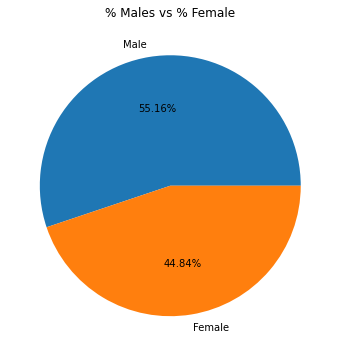

In [70]:
# prepare data for chart
data = [pokemon['percentage_male'].mean(), pokemon['percentage_female'].mean()]

# plot result on pie chart
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(data, labels=['Male', 'Female'], autopct='%.2f%%')
ax.set_title('% Males vs % Female')

**2. Number of Pokemon per Type**

,Type1_Count,Type2_Count
Types,,
bug,72,5
dark,29,21
dragon,27,17
electric,39,9
fairy,18,29
fighting,28,25
fire,52,13
flying,3,95
ghost,27,14


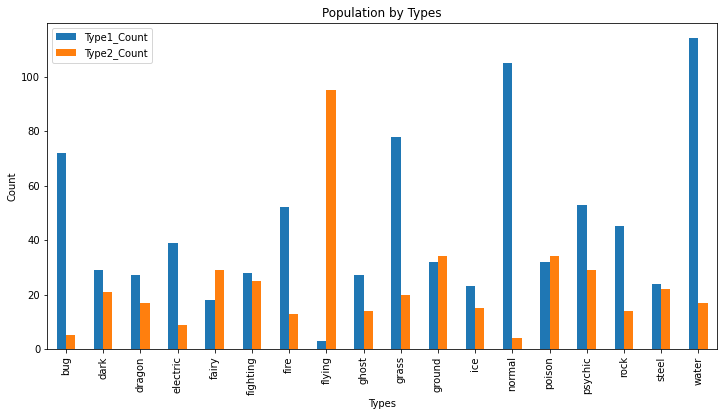

In [71]:
# prepare data for chart
sql_query = 'SELECT type1 AS Type, COUNT(type1) AS Type1_Count FROM poke GROUP BY Type'
data1 = pd.read_sql(sql_query, conn)

sql_query = 'SELECT type2 AS Type, COUNT(type2) AS Type2_Count FROM poke WHERE type2 IS NOT NULL GROUP BY Type'
data2 = pd.read_sql(sql_query, conn)

data = pd.DataFrame().assign(Types=data1['Type'], Type1_Count=data1['Type1_Count'], Type2_Count=data2['Type2_Count'])
data = data.set_index('Types')


# show DataFrame created from SQL queries + plot results on bar graph
data.plot(kind='bar', figsize=(12,6), title='Population by Types', ylabel='Count')
data

### The Bigger the Stronger?

**3. base_total vs weight_kg**

,base_total,weight_kg
base_total,1.000000,0.458111
weight_kg,0.458111,1.000000


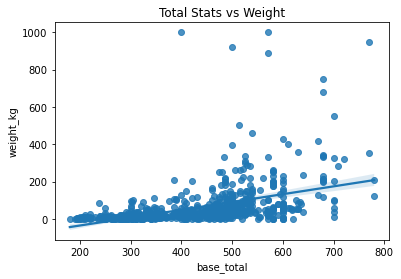

In [72]:
# assigning 2 columns to new DataFrame
data = pd.DataFrame().assign(base_total=pokemon['base_total'], weight_kg=pokemon['weight_kg'])

# visualizing new DataFrame + displaying correlation between two columns/variables
sns.regplot(x=data['base_total'], y=data['weight_kg']).set_title('Total Stats vs Weight')
data.corr()

**4. base_total vs height_m**


,base_total,height_m
base_total,1.000000,0.535063
height_m,0.535063,1.000000


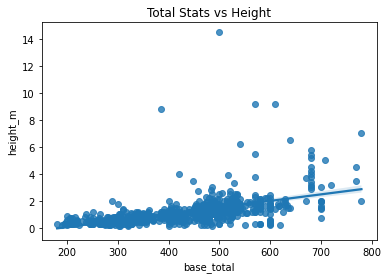

In [73]:
# assigning 2 columns to new DataFrame
data = pd.DataFrame().assign(base_total=pokemon['base_total'], height_m=pokemon['height_m'])

# visualizing new DataFrame + displaying correlation between two columns/variables
sns.regplot(x=data['base_total'], y=data['height_m']).set_title('Total Stats vs Height')
data.corr()

 <br>

### The Stronger the Harder to Catch?

**5. base_total vs capture_rate**

,base_total,capture_rate
base_total,1.000000,-0.708563
capture_rate,-0.708563,1.000000


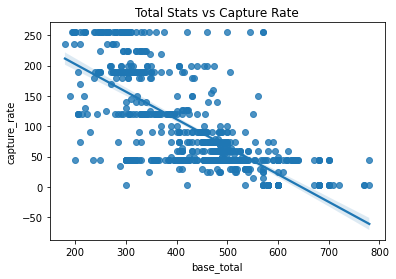

In [74]:
# assigning 2 columns to new DataFrame
data = pd.DataFrame().assign(base_total=pokemon['base_total'], capture_rate=pokemon['capture_rate'])

# visualizing new DataFrame + displaying correlation between two columns/variables
sns.regplot(x=data['base_total'], y=data['capture_rate']).set_title('Total Stats vs Capture Rate')
data.corr()

 <br>

### Pokemon with the Best Statistics?

**6. Which Types have the best Stats (excluding Legendaries)?**

In [75]:
# SQL query data for boxplots
sql_query = 'SELECT type1 AS Type, base_total AS Total_Stats, hp, attack, defense, sp_attack, sp_defense, speed FROM poke WHERE is_legendary IS NOT 1'
data = pd.read_sql(sql_query, conn)
data = data.set_index('Type')

<AxesSubplot:title={'center':'Total_Stats'}, xlabel='Type'>

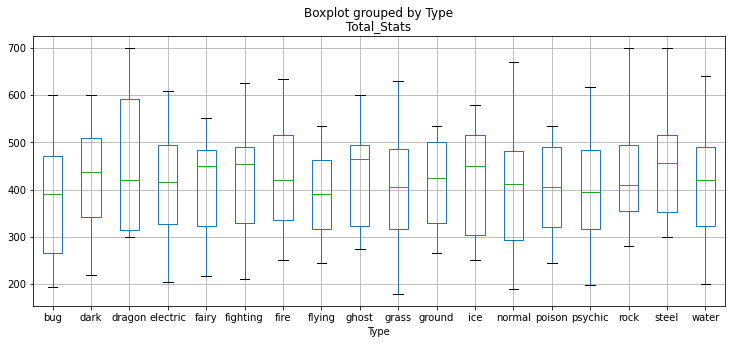

In [76]:
data.boxplot(column=['Total_Stats'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'hp'}, xlabel='Type'>

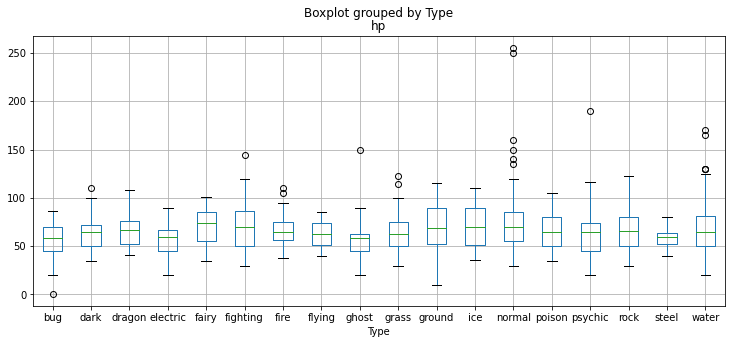

In [77]:
data.boxplot(column=['hp'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'attack'}, xlabel='Type'>

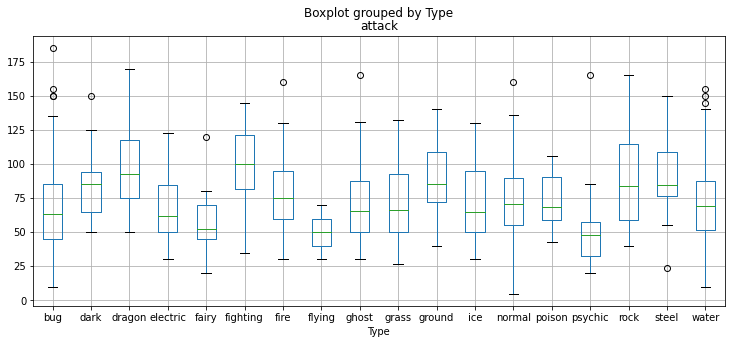

In [78]:
data.boxplot(column=['attack'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'defense'}, xlabel='Type'>

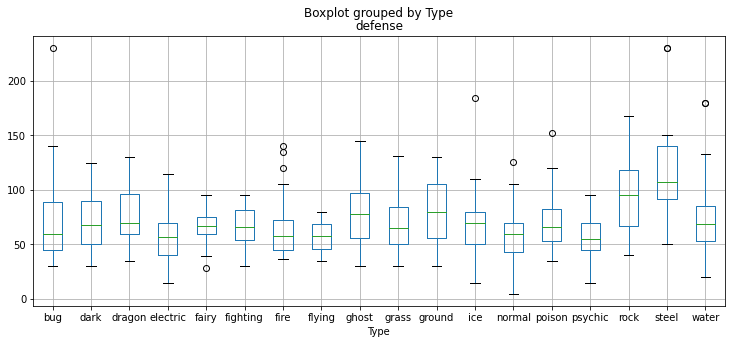

In [79]:
data.boxplot(column=['defense'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'sp_attack'}, xlabel='Type'>

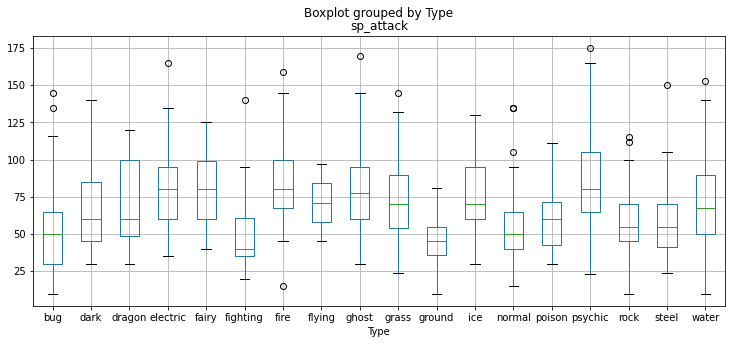

In [80]:
data.boxplot(column=['sp_attack'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'sp_defense'}, xlabel='Type'>

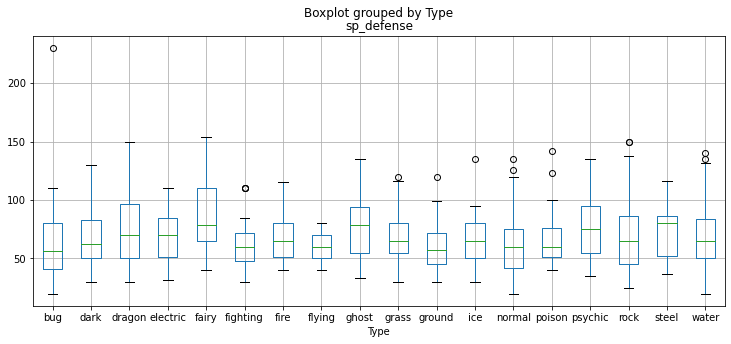

In [81]:
data.boxplot(column=['sp_defense'], figsize=(12,5), by='Type')

<AxesSubplot:title={'center':'speed'}, xlabel='Type'>

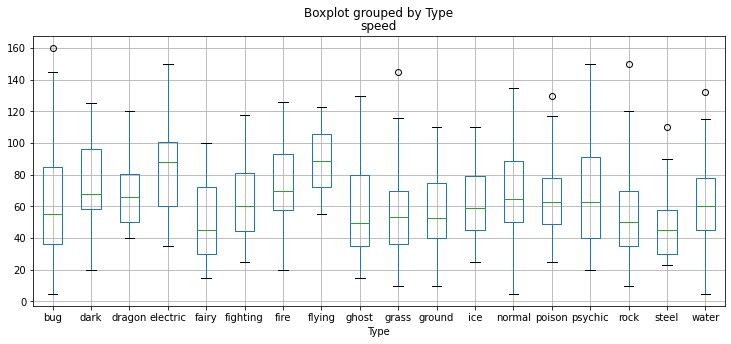

In [82]:
data.boxplot(column=['speed'], figsize=(12,5), by='Type')

**7. Which Generations have the best Stats?**

<AxesSubplot:title={'center':'Stats by Generation'}, xlabel='generation'>

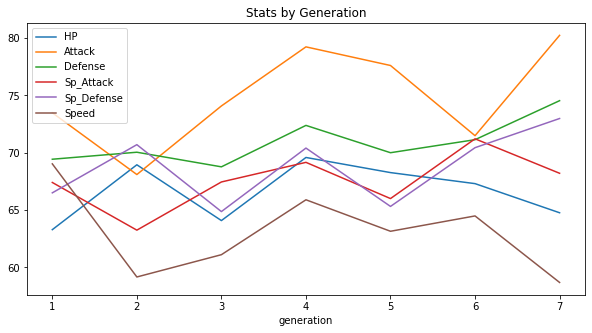

In [83]:
# SQL query data for line chart
sql_query = 'SELECT generation, AVG(hp) AS HP, AVG(attack) AS Attack, AVG(defense) AS Defense, AVG(sp_attack) AS Sp_Attack, AVG(sp_defense) AS Sp_Defense, AVG(speed) AS Speed FROM poke WHERE is_legendary IS NOT 1 GROUP BY generation'
data = pd.read_sql(sql_query, conn)
data = data.set_index('generation')

data.plot(figsize=(10,5), title='Stats by Generation')

<AxesSubplot:title={'center':'Total Stats by Generation'}, xlabel='generation'>

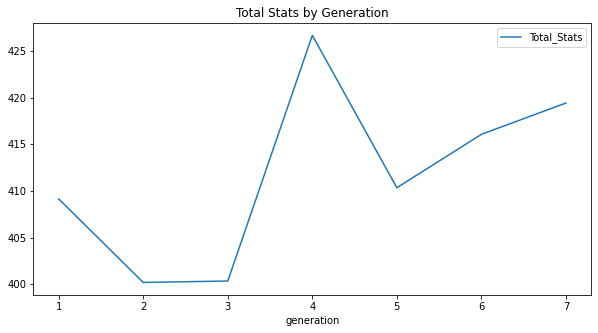

In [84]:
# SQL query data for line chart
sql_query = 'SELECT generation, AVG(base_total) AS Total_Stats FROM poke WHERE is_legendary IS NOT 1 GROUP BY generation'
data = pd.read_sql(sql_query, conn)
data = data.set_index('generation')

data.plot(figsize=(10,5), title='Total Stats by Generation')

**8. Which Generation has the strongest Legendaries?**


<AxesSubplot:title={'center':'Stats of Legendaries by Generation'}, xlabel='generation'>

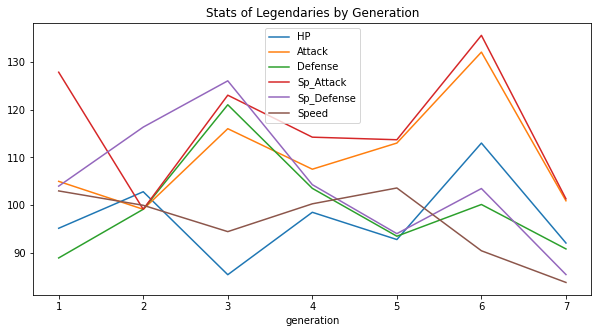

In [85]:
# SQL query data for line chart
sql_query = 'SELECT generation, AVG(hp) AS HP, AVG(attack) AS Attack, AVG(defense) AS Defense, AVG(sp_attack) AS Sp_Attack, AVG(sp_defense) AS Sp_Defense, AVG(speed) AS Speed FROM poke WHERE is_legendary IS 1 GROUP BY generation'
data = pd.read_sql(sql_query, conn)
data = data.set_index('generation')

data.plot(figsize=(10,5), title='Stats of Legendaries by Generation')

 <br>

<AxesSubplot:title={'center':'Total Stats of Legendaries by Generation'}, xlabel='generation'>

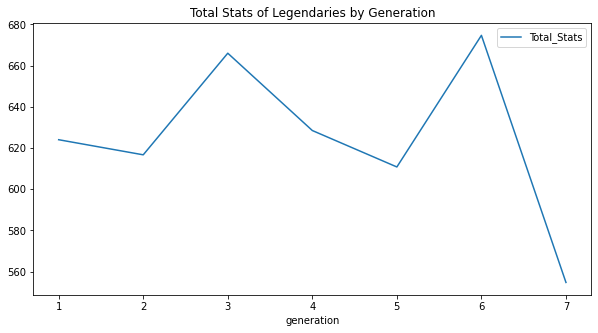

In [88]:
sql_query = 'SELECT generation, AVG(base_total) AS Total_Stats FROM poke WHERE is_legendary IS 1 GROUP BY generation'
data = pd.read_sql(sql_query, conn)
data = data.set_index('generation')

data.plot(figsize=(10,5), title='Total Stats of Legendaries by Generation')

### Matchups Between Types

**9. Which Types performs the best Against others**

<AxesSubplot:title={'center':'Type Effectiveness Against Others'}, ylabel='Effectiveness'>

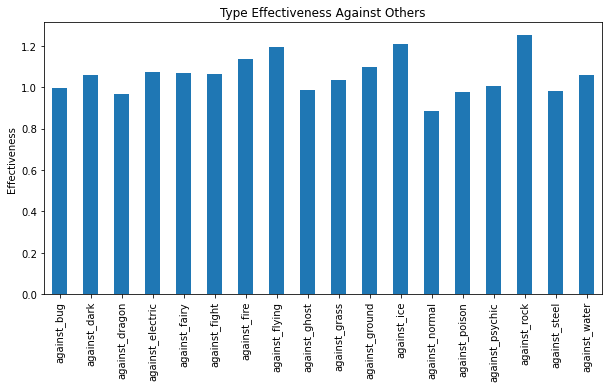

In [89]:
# getting averages for all against_'types' columns
data = pokemon.iloc[:,20:].mean()
data.plot(kind='bar', figsize=(10,5), title='Type Effectiveness Against Others', ylabel='Effectiveness')

---

## **Conclusion**

### Types that Appeared the Most
**Water** **,Normal**, **Grass** and **Bug** seem to be the primary types that appear the most. <br>
**Flying**, **Poison** and **Ground** seem to be the secondary types that appear the least (ESPECIALLY Flying).<br>
**Flying** was the most appearing secondary type by far and **Normal** was the least appearing secondary type.

 <br>

### Weight and Height were not as Important to Total Stats as I'd Hoped
The data on weight and total stats did not have a strong correlation of 0.458. The correlation between height and total stats was a bit stronger at 0.535 but it was fair to say that height and weight are not truly reliable data in order to attempt the total stats of a pokemon. 

 <br>

### Capture Rate is strongly correlated with Total Stats!
Althought weight and height were a bit of a let down with their correlations, the Capture wasn't as it had a correlation with total stats of -0.709. It seems that the better stats a pokemon has the harder they are to catch which does make sense.

 <br>

### The Types with the Best Stats
|Statistic|Highest|Lowest|
|---|---|---|
|**Total Stats**|Steel, Fighting|Bug, Flying|
|**HP**|Fairy, Ice|Ghost, Bug|
|**Attack**|Fighting, Dragon|Psychic, Flying|
|**Defense**|Steel, Rock|Psychic, Electricity|
|**Special Attack**|Psychic, Fire|Fighting, Ground|
|**Special Defense**|Steel, Ghost|Bug, Ground|
|**Speed**|Flying, Electric|Fairy, Steel|

**Things that Made Sense:**
<br>Fighitng and Dragon having the highest attack.
<br>Steel and Rock having the highest defense.
<br>Psychic and Fire having the highest special attack (non-physical).
<br>Flying and Electric having the highest speed.
<br>Fighting and Ground having the lowest special attack
<br>Bug and Ground having the lowest special defense

**Things that Surprised me:**
<br>Fairy and Ice with the highest Hit Points, I'd assume that they'd be easier to defeat due to their type's nature.
<br>Ground having one of the lowest special defense.
<br>Fairy being the slowest type, I'd assume that they'd be faster!

**Also, some types appeared 3 times (ex. steel, fighting, flying) while some types did not appear at all (water, grass, dark etc.)!**

 <br>

### Best Generations!
##### Non-Legendaries
|Statistic|Highest|Lowest|
|---|---|---|
|**Total Stats**|Gen 4|Gen 2|
|**HP**|Gen 4|Gen 1|
|**Attack**|Gen 7|Gen 2|
|**Defense**|Gen 7|Gen 3|
|**Special Attack**|Gen 6|Gen 2|
|**Special Defense**|Gen 7|Gen 3|
|**Speed**|Gen 1|Gen 7|

I loved that Gen 4 came out on top in terms of Total Stats (and even HP) because that's the Gen that introduced me to pokemon and why I fell in love with it. It is currently and has always been my favorite so I'm glad the statistics justifies my choice as well.
<br>
However, it is interesting that Gen 7 appears the highest for 3 stats while Gen 4 only appears 1 stat (excluding Total Stats) and it still beats Gen 7 in regards to Total Stats.
<br><br>
##### Legendaries
In terms of legendaries only, the visualizations of Total Stats seems to be pretty consistent with the individual stats. Gen 6 and 3 legendaries seem to be best for most statistics.

 <br>

### Most Effective Types...
Using the against_*type* data, I found out what type will most likely be most effective against all the pokemon in the dataset. The winners for most effective was Rock with Ice coming in second. The least effective type was Normal with Dragon coming in second.<br>
I was sad my favorite types like dragon, fire, and electricity were on the top and to make things worse Dragon was the second least effective! I was happy seeing normal being the most least effective because I've always hated how boring that type was.

---